In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, UpsamplingCARE

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
(X,Y), (X_val,Y_val), axes = load_training_data('/data/u934/service_imagerie/v_kapoor/JesusCARE/Train/TrainingData/JesusCareCADGFPExcellentupsampling3D.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 149299
number of validation images:	 16589
image size (3D):		 (8, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


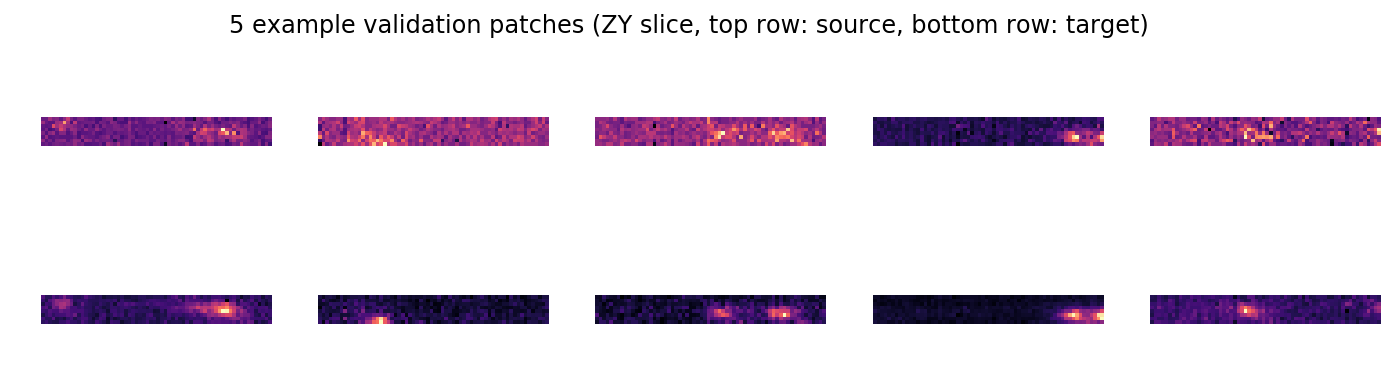

In [3]:
plt.figure(figsize=(12,3))
plot_some(X_val[:5,...,0,0],Y_val[:5,...,0,0])
plt.suptitle('5 example validation patches (ZY slice, top row: source, bottom row: target)');

In [4]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=400, train_batch_size=16)
print(config)
vars(config)

Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=16, train_checkpoint='weights_best.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'patience': 10, 'factor': 0.5}, train_steps_per_epoch=400, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=2, unet_n_first=32, unet_residual=True)


{'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 3,
 'probabilistic': False,
 'train_batch_size': 16,
 'train_checkpoint': 'weights_best.h5',
 'train_epochs': 100,
 'train_learning_rate': 0.0004,
 'train_loss': 'mae',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'train_steps_per_epoch': 400,
 'train_tensorboard': True,
 'unet_input_shape': (None, None, None, 1),
 'unet_kern_size': 3,
 'unet_last_activation': 'linear',
 'unet_n_depth': 2,
 'unet_n_first': 32,
 'unet_residual': True}

In [5]:
model = UpsamplingCARE(config, 'JesusCareCADGFPExcellentupsampling3D', basedir='models')

In [6]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/100
400/400 [==============================] - 595s 1s/step - loss: 0.0468 - mse: 0.0046 - mae: 0.0468 - val_loss: 0.0413 - val_mse: 0.0033 - val_mae: 0.0413
Epoch 2/100
400/400 [==============================] - 597s 1s/step - loss: 0.0394 - mse: 0.0030 - mae: 0.0394 - val_loss: 0.0422 - val_mse: 0.0032 - val_mae: 0.0422
Epoch 3/100
400/400 [==============================] - 597s 1s/step - loss: 0.0387 - mse: 0.0028 - mae: 0.0387 - val_loss: 0.0385 - val_mse: 0.0028 - val_mae: 0.0385
Epoch 4/100
400/400 [==============================] - 596s 1s/step - loss: 0.0381 - mse: 0.0027 - mae: 0.0381 - val_loss: 0.0376 - val_mse: 0.0027 - val_mae: 0.0376
Epoch 5/100
400/400 [==============================] - 596s 1s/step - loss: 0.0381 - mse: 0.0027 - mae: 0.0381 - val_loss: 0.0378 - val_mse: 0.0027 - val_mae: 0.0378
Epoch 6/100
400/400 [==============================] - 596s 1s/step - loss: 0.0380 - mse: 0.0027 - mae: 0.0380 - val_loss: 0.0387 - val_mse: 0.0029 - val_mae: 0.0387
Epoc

400/400 [==============================] - 593s 1s/step - loss: 0.0361 - mse: 0.0025 - mae: 0.0361 - val_loss: 0.0361 - val_mse: 0.0025 - val_mae: 0.0361
Epoch 50/100
400/400 [==============================] - 593s 1s/step - loss: 0.0361 - mse: 0.0025 - mae: 0.0361 - val_loss: 0.0360 - val_mse: 0.0024 - val_mae: 0.0360
Epoch 51/100
400/400 [==============================] - 593s 1s/step - loss: 0.0362 - mse: 0.0025 - mae: 0.0362 - val_loss: 0.0360 - val_mse: 0.0025 - val_mae: 0.0360
Epoch 52/100
400/400 [==============================] - 593s 1s/step - loss: 0.0360 - mse: 0.0025 - mae: 0.0360 - val_loss: 0.0360 - val_mse: 0.0025 - val_mae: 0.0360
Epoch 53/100
400/400 [==============================] - 592s 1s/step - loss: 0.0362 - mse: 0.0025 - mae: 0.0362 - val_loss: 0.0360 - val_mse: 0.0024 - val_mae: 0.0360
Epoch 54/100
400/400 [==============================] - 593s 1s/step - loss: 0.0359 - mse: 0.0024 - mae: 0.0359 - val_loss: 0.0360 - val_mse: 0.0025 - val_mae: 0.0360
Epoch 55/10

400/400 [==============================] - 594s 1s/step - loss: 0.0358 - mse: 0.0024 - mae: 0.0358 - val_loss: 0.0358 - val_mse: 0.0024 - val_mae: 0.0358
Epoch 97/100
400/400 [==============================] - 594s 1s/step - loss: 0.0359 - mse: 0.0024 - mae: 0.0359 - val_loss: 0.0358 - val_mse: 0.0024 - val_mae: 0.0358
Epoch 98/100
400/400 [==============================] - 593s 1s/step - loss: 0.0357 - mse: 0.0024 - mae: 0.0357 - val_loss: 0.0358 - val_mse: 0.0024 - val_mae: 0.0358
Epoch 99/100
400/400 [==============================] - 593s 1s/step - loss: 0.0356 - mse: 0.0024 - mae: 0.0356 - val_loss: 0.0358 - val_mse: 0.0024 - val_mae: 0.0358
Epoch 100/100
400/400 [==============================] - 594s 1s/step - loss: 0.0357 - mse: 0.0024 - mae: 0.0357 - val_loss: 0.0358 - val_mse: 0.0024 - val_mae: 0.0358


['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


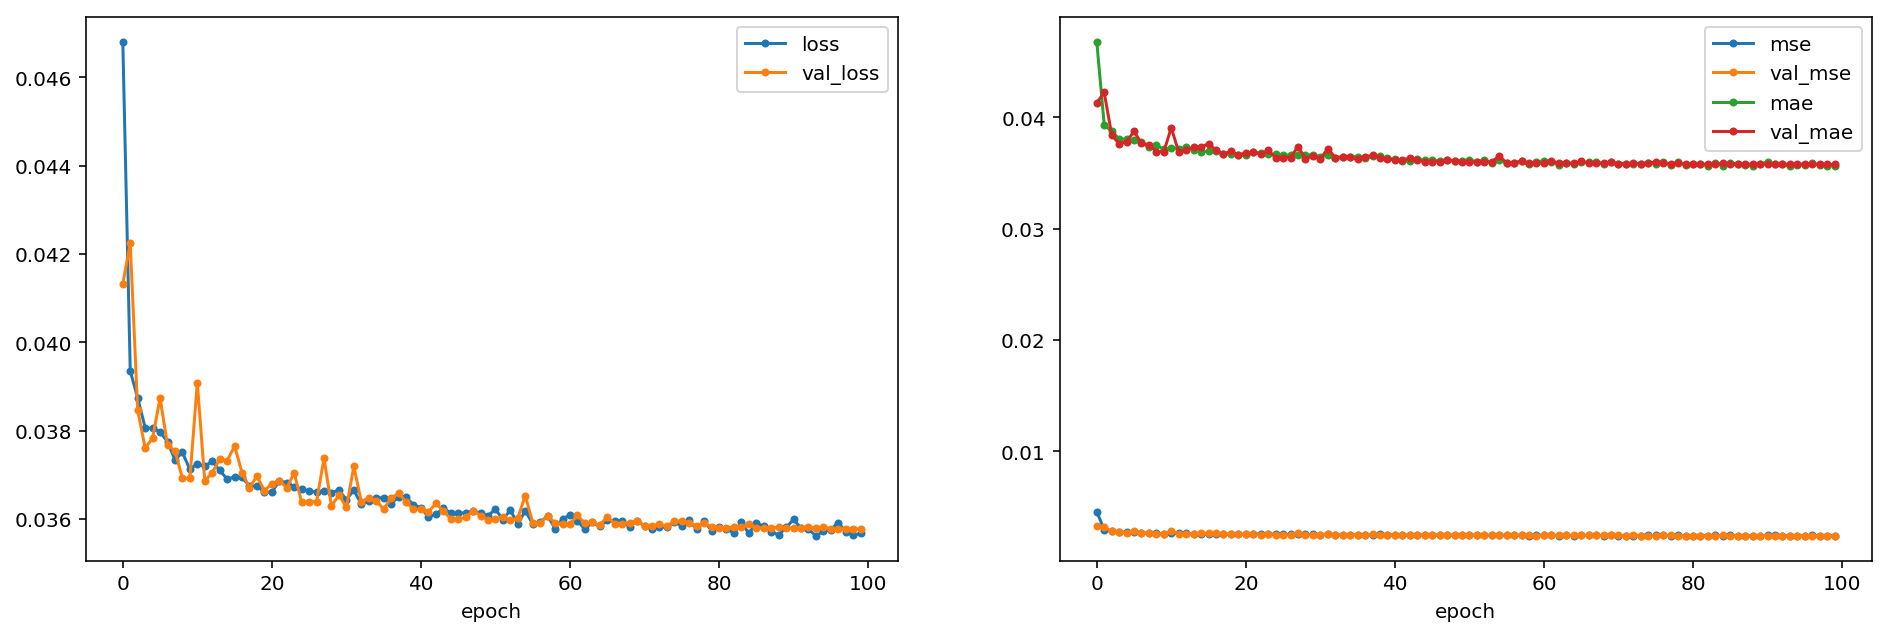

In [7]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

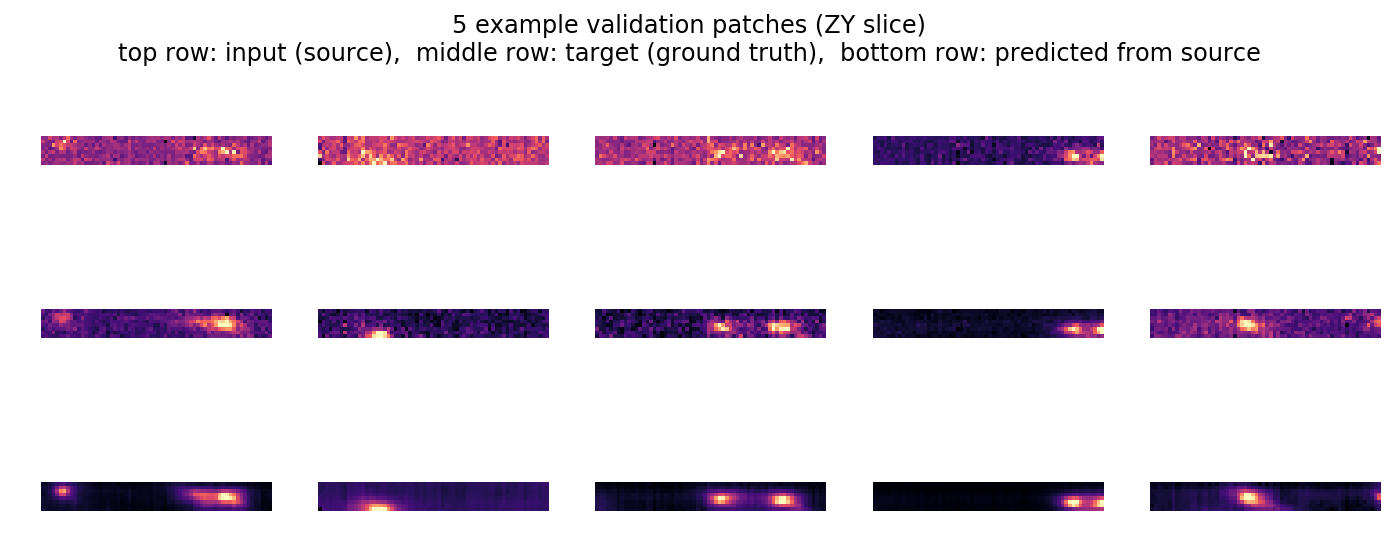

In [8]:
plt.figure(figsize=(12,4.5))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5,...,0,0],Y_val[:5,...,0,0],_P[...,0,0],pmax=99.5)
plt.suptitle('5 example validation patches (ZY slice)\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

In [9]:
model.export_TF()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpztpkedfz/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/data/u934/service_imagerie/v_kapoor/anaconda2/bin/CSBDeep/examples/CAREforCurie/upsampling3D/models/JesusCareCADGFPExcellentupsampling3D/TF_SavedModel.zip
